<a href="https://colab.research.google.com/github/ekanshtrivedi/machine-learning/blob/master/ML_J066_EXP_13_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

!pip install livelossplot
from livelossplot import PlotLossesKeras
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
x_train_gray = x_train[:,:,:,0]
x_test_gray = x_test[:,:,:,0]

In [4]:
print('Training Shape:', x_train_gray.shape)
print('Number of train samples:', x_train_gray.shape[0])
print('Number of test samples:', x_test_gray.shape[0])
x_val = x_test_gray[:7000]
x_test = x_test_gray[7000:]
print("Validation Data Shape: {0} \nTest Data Shape: {1}".format(x_val.shape, x_test.shape))

Training Shape: (50000, 32, 32)
Number of train samples: 50000
Number of test samples: 10000
Validation Data Shape: (7000, 32, 32) 
Test Data Shape: (3000, 32, 32)


In [5]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(64, activation = 'relu')(input_img)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [6]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
print('Training Shape:', x_train_gray.shape)
print("Validation Shape: ",(x_val.shape, x_test.shape))
print('Testing Shape:', x_test.shape)

Training Shape: (50000, 32, 32)
Validation Shape:  ((7000, 32, 32), (3000, 32, 32))
Testing Shape: (3000, 32, 32)


In [8]:
batch_size = 32
num_classes = 10
epochs = 10
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(x_train_gray, x_train_gray, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_val, x_val), 
                    callbacks = [mc])

Epoch 1/10
1560/1563 [============================>.] - ETA: 0s - loss: 0.5922
Epoch 00001: val_loss improved from inf to 0.58487, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5922 - val_loss: 0.5849
Epoch 2/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.5796
Epoch 00002: val_loss improved from 0.58487 to 0.57954, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5795 - val_loss: 0.5795
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.5747
Epoch 00003: val_loss improved from 0.57954 to 0.57384, saving model to AutoEncoder_Cifar10_Deep_weights.hdf5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5747 - val_loss: 0.5738
Epoch 4/10
1559/1563 [============================>.] - ETA: 0s - loss: 0.5729
Epoch 00004: val_loss improved from 0.57384 to 0.57345, saving model to AutoEncoder_C

In [9]:
score = model.evaluate(x_test, x_test, verbose=1)
print(score)

94/94 [==============================] - 0s 4ms/step - loss: 0.5699
0.5698949098587036


In [10]:
c10test = model.predict(x_test)
c10val = model.predict(x_val)
print("Validation Dataset Score: {0}\nTest Dataset Score: {1}".format(np.average(c10val), np.average(c10test)))

Validation Dataset Score: 0.49782779812812805
Test Dataset Score: 0.492784708738327


In [11]:
def showImage(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

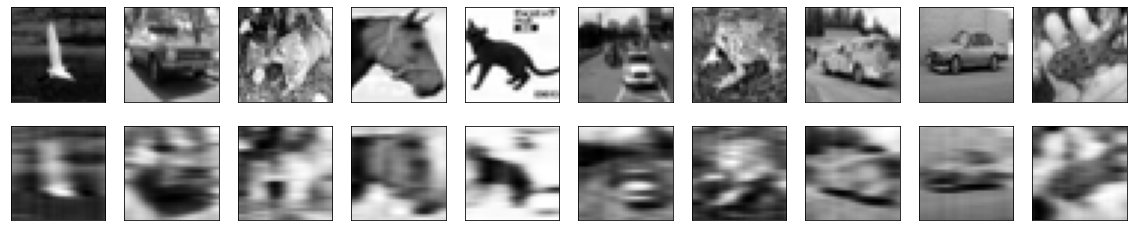

In [12]:
showImage(x_test, c10test)